In [1]:
#This program performs a Stochastic Simulation Algorithm on birth-death process for multiple observations
# 0 -> X -> 0
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Birth-death process with immigration

In [2]:
#Perform the iteration
def bdi_simulate(typ,x_0):
    x=[x_0]                       #initial molecule count
    t_x=[0]
    v=np.array([1, -1, 1,-1])      #reaction vectors
    i=0
    while t_x[i]<N:
        if typ=='simple':
            a=np.array([A*x[i], B*x[i], nu,0] )
        else: 
            #a=np.array([A*x[i]*(1-x[i]/200), B*x[i]*(1+x[i]/200),nu] )
            if x[i]>0:
                a=np.array([A*x[i], B*x[i],nu,w] )
            else:
                a=np.array([A*x[i], B*x[i],nu,0] )
        sum_a=np.sum(a)
        cumsum_a=np.cumsum(a,axis=0)
        epsilon=np.random.uniform(0,1,2)
        dummy=len(cumsum_a)-1
        for k in range(len(a)):
            if cumsum_a[k]>epsilon[0]*sum_a and k<=dummy:
                dummy=k 
        j=dummy               
        tau=(np.log(1/epsilon[1]))/sum_a
        x=np.append(x,[x[i]+v[j]])
        t_x=np.append(t_x,[t_x[i]+tau])
        i+=1
    return x,t_x

def purebirth_simulate(x_0,nt):
    x=np.zeros(nt+1)                       #initial molecule count
    t_x=np.zeros(nt+1)
    x[0]=x_0
    for i in range(nt):
        a=A*(1+x[i]**2)
        epsilon=np.random.uniform(0,1,1)
        tau=(np.log(1/epsilon))/a
        x[i+1]=x[i]+1
        t_x[i+1]=t_x[i]+tau
    return x,t_x    

def subsample(x,t_x):
    y=np.zeros(N+1)
    y[0]=x[0]
    for k in range(1,len(x)):
        i=np.ceil(t_x[k]).astype(int)
        if i>N:
            y[N]=x[last]
            break
        y[i]=x[k]
        last=k
    for i in range(1,N+1):
        if y[i]==0:
            y[i]=y[i-1]
    return y

def bdi(t, y): return  (A-B)*y+nu

def bdi_new(t,y):
    #j=A/(2+y)-B*y+nu
    j=A*y-B*y+nu-w
    return j

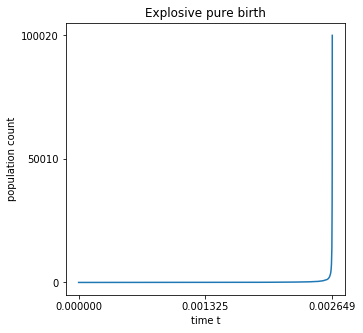

In [3]:
#pure birth process
f=plt.figure(figsize=(5,5))
A=15
x_0=20
nt=100000
x,t=purebirth_simulate(x_0,nt)
plt.plot(t,x)
plt.xticks(np.linspace(0,t[nt],3))
plt.yticks(np.linspace(0,x[nt],3))
plt.ylabel('population count')
plt.xlabel('time t')
plt.title('Explosive pure birth')
f.savefig('explosive_pure_birth.png', format='png', dpi=500,bbox_inches="tight")

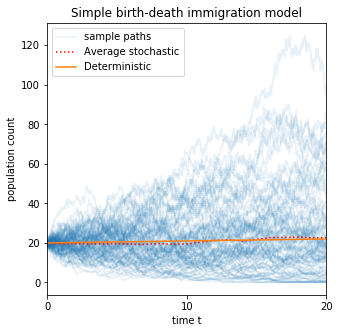

In [4]:
#Simple birth-death process with immigration
A=0.5                          #birth parameter
B=0.5                         #death parameter
nu=0.1                         #immigration parameter 
x_0=20
M =500 #number of repetitions
N= 20                          # end of observation time
f=plt.figure(figsize=(5,5))
y=np.zeros([N+1,M])
for i in range(M):
    x,t=bdi_simulate('simple',x_0)
    y[:,i]=subsample(x,t)
    if i<M-1:
        plt.plot(t,x,alpha=0.1,c='C0')
    else:
        plt.plot(t,x,alpha=0.1,c='C0',label='sample paths')   
plt.plot(range(N+1),np.mean(y,1),linestyle=':',c='r',label='Average stochastic')
sol = solve_ivp(bdi, [0, N], [x[0]])
plt.plot(sol.t,sol.y.T,c='C1',label='Deterministic')
plt.xlim([0,N])
plt.xticks(np.linspace(0,N,3))
plt.xlabel('time t')
plt.ylabel('population count')
plt.legend()
plt.title('Simple birth-death immigration model')
f.savefig('simple_bdi.png', format='png', dpi=500,bbox_inches="tight")

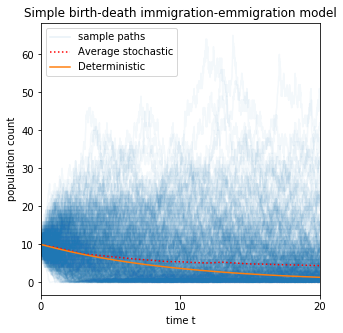

In [5]:
#A NON-simple birth -simple death process with immigration
A=0.9                      #birth parameter
B=1                      #death parameter
nu=1                      #immigration parameter 
w=1
x_0=10
M =500 #number of repetitions
N= 20                          # end of observation time
f=plt.figure(figsize=(5,5))
y=np.zeros([N+1,M])
for i in range(M):
    x,t=bdi_simulate('others',x_0)
    y[:,i]=subsample(x,t)
    if i<M-1:
        plt.plot(t,x,alpha=0.05,c='C0')
    else:
        plt.plot(t,x,alpha=0.1,c='C0',label='sample paths')
plt.plot(range(N+1),np.mean(y,1),linestyle=':',c='r',label='Average stochastic')
sol = solve_ivp(bdi_new, [0, N], [x[0]], t_eval=np.linspace(0,N,20))
plt.plot(sol.t,sol.y.T,c='C1',label='Deterministic')
plt.xlim([0,N])
plt.xticks(np.linspace(0,N,3))
plt.xlabel('time t')
plt.ylabel('population count')
plt.legend()
plt.title('Simple birth-death immigration-emmigration model')
f.savefig('bdie.png', format='png', dpi=500,bbox_inches="tight")